# PROJET9: Finding new market for exporting chicken
## Exploratory analysis part2 (PCA, Clustering)

#### Import librairies

In [176]:
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

#### Data import

In [349]:
Chicken_2017=pd.read_csv('Chicken2017.csv')

In [350]:
Chicken_2017.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population
0,Afrique du Sud,143.0,35.69,2118.0,63.0,514.0,1667.0,-0.0,57009.756
1,Albanie,85.0,16.36,47.0,0.0,38.0,13.0,4.0,2884.169
2,Algérie,22.0,6.38,277.0,0.0,2.0,275.0,0.0,41389.189
3,Allemagne,71.0,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658.409
4,Angola,35.0,10.56,319.0,0.0,277.0,42.0,-0.0,29816.766
5,Antigua-et-Barbuda,233.0,54.10,7.0,0.0,7.0,0.0,0.0,95.426
6,Arabie saoudite,151.0,43.36,1435.0,10.0,722.0,616.0,-108.0,33101.179
7,Argentine,182.0,42.24,1962.0,207.0,8.0,2161.0,0.0,43937.140
8,Arménie,54.0,16.06,47.0,0.0,35.0,11.0,-2.0,2944.791
9,Australie,192.0,47.65,1171.0,42.0,16.0,1269.0,71.0,24584.620


### Before performing a PCA, I check the correlation between the variables

In [351]:
corr=Chicken_2017.corr()

<AxesSubplot:>

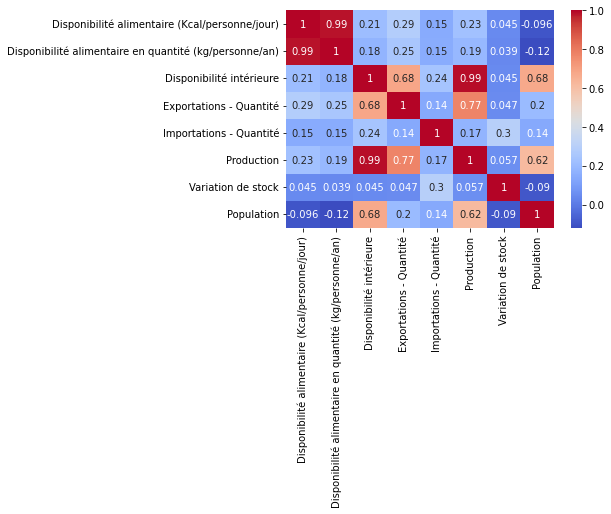

In [352]:
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)

#### We have 2 pairs of variables very correlated. "Production" with "Disponibilité intérieur" and "Disponibilité alimentaire en quantité (kg/personne/an)" with "Disponibilité alimentaire (Kcal/personne/jour)". Therefore I will only use one of each for the rest of the analysis. I will keep "production" and "Disponibilité alimentaire en quantité (kg/personne/an)". 

In [353]:
Chicken_2017=Chicken_2017.drop(['Disponibilité intérieure','Disponibilité alimentaire (Kcal/personne/jour)'],axis=1)
Chicken_2017

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population
0,Afrique du Sud,35.69,63.0,514.0,1667.0,-0.0,57009.756
1,Albanie,16.36,0.0,38.0,13.0,4.0,2884.169
2,Algérie,6.38,0.0,2.0,275.0,0.0,41389.189
3,Allemagne,19.47,646.0,842.0,1514.0,-29.0,82658.409
4,Angola,10.56,0.0,277.0,42.0,-0.0,29816.766
...,...,...,...,...,...,...,...
129,Égypte,12.96,1.0,110.0,1118.0,-23.0,96442.591
130,Émirats arabes unis,43.47,94.0,433.0,48.0,-26.0,9487.203
131,Équateur,19.31,0.0,0.0,340.0,-1.0,16785.361
132,États-Unis d'Amérique,55.68,3692.0,123.0,21914.0,80.0,325084.756


In [354]:
#Setting the countries as index
Chicken_2017.set_index('Zone',inplace=True)

## Now Let's perform a PCA to reduce the dimentionality to then visualize first the relationships between the variables and thoses 2 PCs. Finally plot the countries with the PC coordonates and analyse which area of the graph would be the more suitable for exporting. 

## PCA

### Data Standardization

#### Splitting the dataset in variables between our quantitative data, index and column names

In [355]:
#Datas
x=Chicken_2017.values

In [357]:
type(x)

numpy.ndarray

In [358]:
countries=Chicken_2017.index
countries

Index(['Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne', 'Angola',
       'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie',
       'Australie',
       ...
       'Uruguay', 'Venezuela (République bolivarienne du)', 'Viet Nam',
       'Yémen', 'Zambie', 'Égypte', 'Émirats arabes unis', 'Équateur',
       'États-Unis d'Amérique', 'Îles Salomon'],
      dtype='object', name='Zone', length=134)

In [359]:
col=Chicken_2017.columns
col

Index(['Disponibilité alimentaire en quantité (kg/personne/an)',
       'Exportations - Quantité', 'Importations - Quantité', 'Production',
       'Variation de stock', 'Population'],
      dtype='object')

#### Standardization (z score)

In [360]:
#Initialising the object StandardScaler
stand=StandardScaler()

In [361]:
#Method fit_transform to standarize the datas
stand_x=stand.fit_transform(x)

In [363]:
#Back to DataFrame format
df_T_chicken=pd.DataFrame(stand_x,columns=col,index=countries)
df_T_chicken

,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population
Zone,,,,,,
Afrique du Sud,0.892940,-0.136597,1.990769,0.280981,-0.199216,0.042476
Albanie,-0.421378,-0.259247,-0.341778,-0.317074,-0.151632,-0.273115
Algérie,-1.099955,-0.259247,-0.518189,-0.222340,-0.199216,-0.048604
Allemagne,-0.209918,0.998398,3.598070,0.225659,-0.544205,0.192025
Angola,-0.815741,-0.259247,0.829395,-0.306589,-0.199216,-0.116079
...,...,...,...,...,...,...
Égypte,-0.652557,-0.257300,0.011044,0.082473,-0.472828,0.272397
Émirats arabes unis,1.421930,-0.076246,1.593844,-0.304419,-0.508517,-0.234615
Équateur,-0.220797,-0.259247,-0.527990,-0.198837,-0.211113,-0.192061


In [364]:
# Checking if the mean is equal to 0 and the std to 1
df_T_chicken.describe().round(2)

,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population
count,134.00,134.00,134.00,134.00,134.00,134.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.50,-0.26,-0.53,-0.32,-1.61,-0.29
25%,-0.70,-0.26,-0.51,-0.31,-0.20,-0.27
50%,-0.15,-0.25,-0.42,-0.28,-0.20,-0.23
75%,0.57,-0.19,0.01,-0.09,-0.07,-0.09
max,3.05,7.96,4.71,7.60,10.02,8.00


### Calcul of Principal components

In [365]:
#Initialising the object PCA with the 6 first components
pca = PCA(n_components=6)

In [366]:
#Computing of the principal components
pca=pca.fit(df_T_chicken)

#### Visualisation of the explained of variance for each components

In [367]:
pca.explained_variance_ratio_

array([0.369076  , 0.21866716, 0.18001414, 0.12508509, 0.09148062,
       0.01567698])

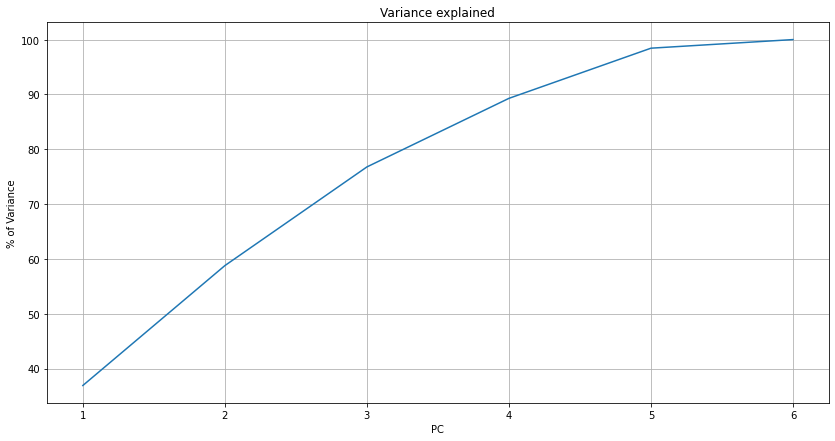

In [368]:
variance = (pca.explained_variance_ratio_*100).round(2).cumsum()
components=list(range(1,7))
#Graph
plt.figure(figsize=(14,7))
plt.plot(components, variance)
plt.xlabel("PC")
plt.ylabel("% of Variance")
plt.title("Variance explained")
plt.grid()
plt.show()

#### The 2 first principal components represent less than 60% of the variation. I decide to use the third one too to get more than 75% of the variance

In [369]:
pca = PCA(n_components=3)
pca=pca.fit(df_T_chicken)

#### Let see now the coordonates of the 3 Eigen Vectors

In [370]:
df_pc=pd.DataFrame({"V-PC1":pca.components_[0],"V-PC2":pca.components_[1],"V-PC3":pca.components_[2]})

In [371]:
df_pc

,V-PC1,V-PC2,V-PC3
0,0.206603,0.387898,-0.676459
1,0.551736,0.000202,-0.283562
2,0.251788,0.517481,0.368934
3,0.637743,-0.153497,-0.012374
4,0.088144,0.629768,0.381513
5,0.418354,-0.401970,0.424474


#### Let see the weight of each variable for the 3 vectors

In [372]:
df_pc.index=col
df_pc.transpose()

,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population
V-PC1,0.206603,0.551736,0.251788,0.637743,0.088144,0.418354
V-PC2,0.387898,0.000202,0.517481,-0.153497,0.629768,-0.401970
V-PC3,-0.676459,-0.283562,0.368934,-0.012374,0.381513,0.424474


#### Circle of correlation:

In [373]:
#Let's write a function for it
def cirCorr(EigenV,acp,N):
    if N==0:
        fig, ax = plt.subplots(figsize=(7, 7))
        for i in range(0, EigenV.shape[0]):
            ax.arrow(0,0,EigenV.iloc[i, 0],EigenV.iloc[i, 1], head_width=0.07,
                     head_length=0.07, width=0.02)            

            plt.text(EigenV.iloc[i, 0] + 0.05, EigenV.iloc[i, 1],EigenV.index[i])

        # Horizontals and verticals lines
        plt.plot([-1, 1], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-1, 1], color='grey', ls='--')


        # % of the variance explained for each component
        plt.xlabel('PC1 ' + str(100*acp.explained_variance_ratio_[0].round(2))+"%")
        plt.ylabel('PC2 ' + str(100*acp.explained_variance_ratio_[1].round(2))+"%")

        plt.title("Correlation circle (PC1 et PC2)")
    elif N==1:
        fig, ax = plt.subplots(figsize=(7, 7))
        for i in range(0, EigenV.shape[0]):
            ax.arrow(0,0,EigenV.iloc[i, 0],EigenV.iloc[i, 2], head_width=0.07,
                     head_length=0.07, width=0.02)            

            plt.text(EigenV.iloc[i, 0] + 0.05, EigenV.iloc[i, 2],EigenV.index[i])

        plt.plot([-1, 1], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-1, 1], color='grey', ls='--')


        plt.xlabel('PC1 ' + str(100*acp.explained_variance_ratio_[0].round(2))+"%")
        plt.ylabel('PC3 ' + str(100*acp.explained_variance_ratio_[2].round(2))+"%")

        plt.title("Correlation circle (PC1 et PC3)")
   
       #Circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  
    plt.show()


Let see the circle with each principale components

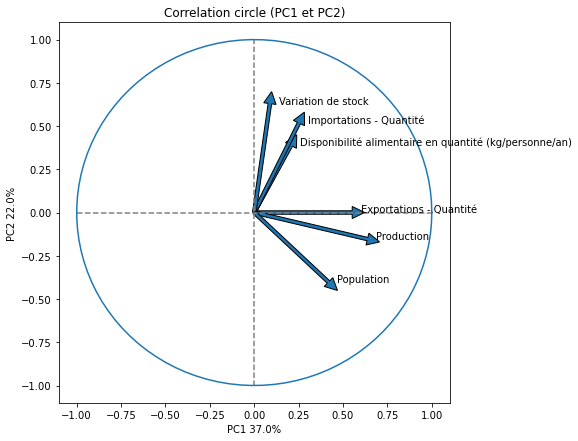

In [374]:
#PC1-PC2
cirCorr(df_pc,pca,0)

### Interpretation for the weight of the variables on PC1 and PC2
#### "Importations" and "Disponibilité alimentaire" ("food availibility") are very correlated. They have a relatively low contribution on PC1 but a stronger positive one on PC2
#### "Production" and "Exportation" on the other hand have a fairly strong positive contribution on CP1
#### Population has a medium positive contribution on PC1 and medium negative on PC2
## As we want to find countries to export, it would be interesting to target countries that have a low production, a low disponibilité alimentaire and the highest population. 
## Therefore the countries  that will appear on the lower left part of the graph

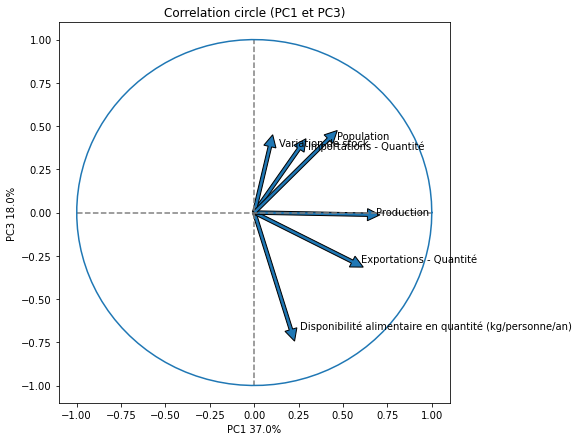

In [375]:
#F1F3
cirCorr(df_pc,pca,1)

### Interpretation for the weight of the variables on PC3
#### For PC3 the main added information would be the variable "Disponibilité alimentaire" that has a strong negative contribution on CP3.
## On this graph we will then look for countries with negative coordonates on PC1 but positives on PC3 (opposite to high "Disponibilité alimentaire" and "production")

## Display of the countries with those 3 components 

#### Calculation of the 3 principal components (linear combination)

In [376]:
PC = pca.transform(df_T_chicken)

#### adding to the dataframe

In [378]:
# Coordonnées sur le 1er axe F1
df_T_chicken['PC1']=PC[:,0]

In [379]:
# Coordonnées sur le 2ème axe F2
df_T_chicken['PC2']=PC[:,1]

In [380]:
df_T_chicken['PC3']=PC[:,2]
df_T_chicken

,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,PC1,PC2,PC3
Zone,,,,,,,,,
Afrique du Sud,0.892940,-0.136597,1.990769,0.280981,-0.199216,0.042476,0.789773,1.190863,0.107708
Albanie,-0.421378,-0.259247,-0.341778,-0.317074,-0.151632,-0.273115,-0.645985,-0.277406,0.062608
Algérie,-1.099955,-0.259247,-0.518189,-0.222340,-0.199216,-0.048604,-0.680452,-0.766670,0.532526
Allemagne,-0.209918,0.998398,3.598070,0.225659,-0.544205,0.192025,1.589711,1.326158,1.057439
Angola,-0.815741,-0.259247,0.829395,-0.306589,-0.199216,-0.116079,-0.364385,0.080980,0.809838
...,...,...,...,...,...,...,...,...,...
Égypte,-0.652557,-0.257300,0.011044,0.082473,-0.472828,0.272397,-0.149123,-0.667389,0.452677
Émirats arabes unis,1.421930,-0.076246,1.593844,-0.304419,-0.508517,-0.234615,0.315902,1.197121,-0.642061
Équateur,-0.220797,-0.259247,-0.527990,-0.198837,-0.211113,-0.192061,-0.547359,-0.384152,-0.131528


#### Display on PC1 and PC2

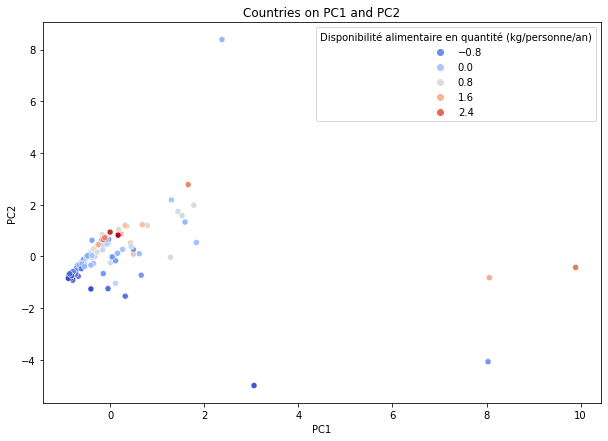

In [381]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="PC1",
                    y="PC2",
                    data=df_T_chicken,hue="Disponibilité alimentaire en quantité (kg/personne/an)",palette="coolwarm")
plt.title("Countries on PC1 and PC2")
plt.show()

Let's diplay the same graph with the name of the outliers

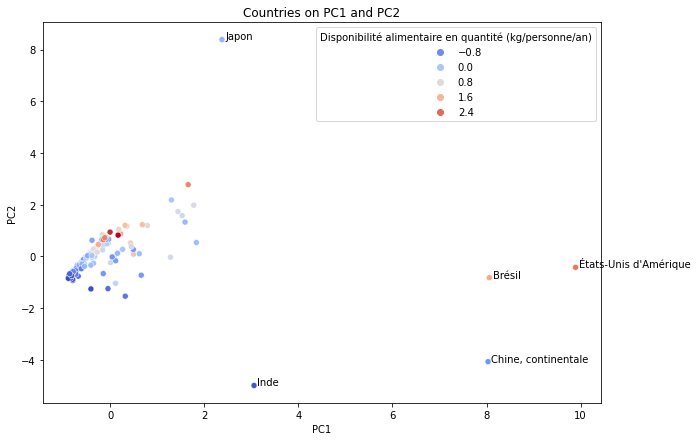

In [383]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="PC1",
                    y="PC2",
                    data=df_T_chicken,hue="Disponibilité alimentaire en quantité (kg/personne/an)",palette="coolwarm")
outliers=df_T_chicken[df_T_chicken.PC1>2]
for name,row in outliers.iterrows():
    plt.text(x=row.PC1+0.07,y=row.PC2,s=name)
plt.title("Countries on PC1 and PC2")
plt.show()

### As those countries are outliers with high production, I decide to remove them

In [385]:
countries_to_remove=['Inde','Chine, continentale',"États-Unis d'Amérique","Japon","Brésil"]
df_T_chicken = df_T_chicken.drop(countries_to_remove)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

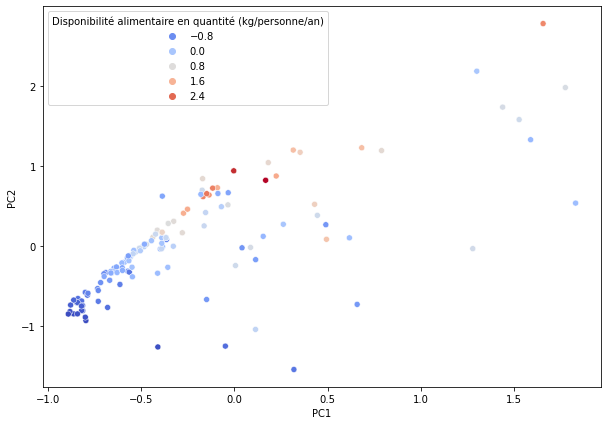

In [386]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="PC1",
                    y="PC2",
                    data=df_T_chicken,hue="Disponibilité alimentaire en quantité (kg/personne/an)",palette="coolwarm")

 #### On PC1 and PC3

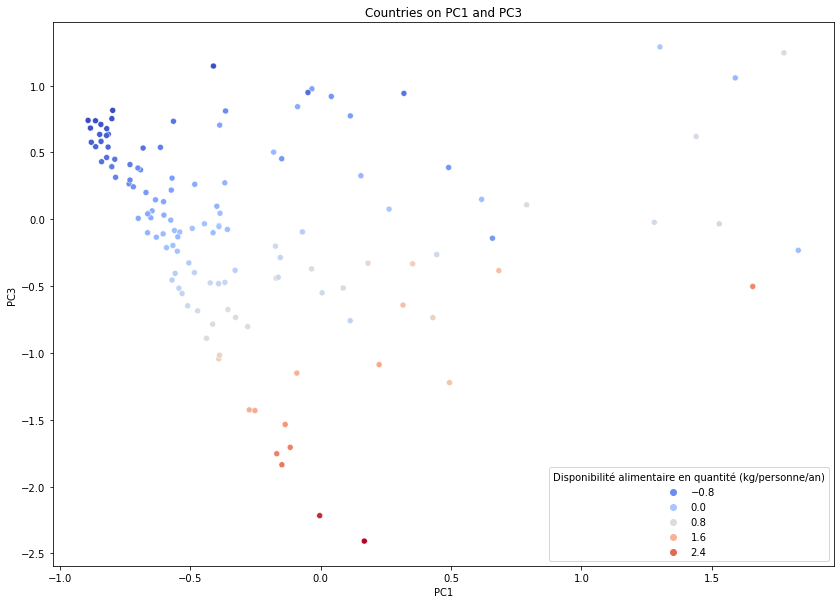

In [387]:
plt.figure(figsize=(14,10))
sns.scatterplot(x="PC1",
                    y="PC3",
                    data=df_T_chicken,hue="Disponibilité alimentaire en quantité (kg/personne/an)",palette="coolwarm")
plt.title("Countries on PC1 and PC3")
plt.show()

## Interprétation

## As we saw on the circles of correlations, on the first graph, we'll target the countries on the lower left part on the PC1PC2 graph the ones on upper left part on the PC1PC3 graph

##### Let' s identify the countries with kmeans methods

## Kmeans with PC1 and PC2

#### Elbow method to find the number of clusters

In [388]:
def inertia_per_group(data,max_k):
    inertie=[]
    k_list=range(1,max_k)
    for k in k_list:
        kmean=KMeans(n_clusters=k) #instanciation of kmean object
        kmean.fit(data) #fit the datas
        inertie.append(kmean.inertia_) #add of the intertia (sum of squares within clusters )
    
    #Affichage
    plt.figure(figsize=(10,5))
    plt.plot(k_list,inertie)
    plt.xlabel("Number of gropus")
    plt.ylabel("Total Sum of square within groups")
    plt.title("Inertia per number of group")
    plt.show()
    

C:\Users\phild\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


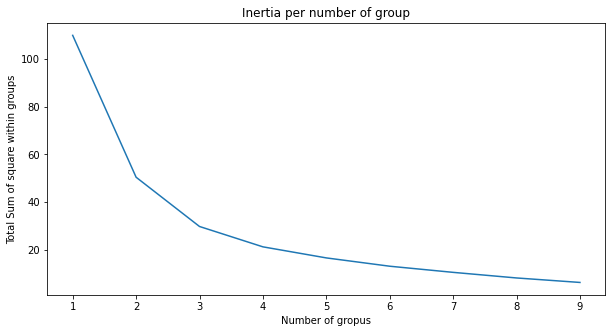

In [389]:
inertia_per_group(df_T_chicken[['PC1','PC2']],10)

#### There is an elbow at 2 groups but the inertia is too high. I decide to go for 6 groups to restrain the number of target countries

#### Instanciation of kmean object for 6 clusters


In [390]:
kmean=KMeans(n_clusters=6)
kmean.fit(df_T_chicken[['PC1','PC2']]) 

KMeans(n_clusters=6)

#### adding a column with the group numbers

In [391]:
groups=kmean.labels_+1
df_T_chicken['g_kmeans']=groups
df_T_chicken

,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,PC1,PC2,PC3,g_kmeans
Zone,,,,,,,,,,
Afrique du Sud,0.892940,-0.136597,1.990769,0.280981,-0.199216,0.042476,0.789773,1.190863,0.107708,4
Albanie,-0.421378,-0.259247,-0.341778,-0.317074,-0.151632,-0.273115,-0.645985,-0.277406,0.062608,1
Algérie,-1.099955,-0.259247,-0.518189,-0.222340,-0.199216,-0.048604,-0.680452,-0.766670,0.532526,1
Allemagne,-0.209918,0.998398,3.598070,0.225659,-0.544205,0.192025,1.589711,1.326158,1.057439,5
Angola,-0.815741,-0.259247,0.829395,-0.306589,-0.199216,-0.116079,-0.364385,0.080980,0.809838,6
...,...,...,...,...,...,...,...,...,...,...
Zambie,-1.301216,-0.257300,-0.469186,-0.304057,-0.199216,-0.191663,-0.820585,-0.749331,0.626484,1
Égypte,-0.652557,-0.257300,0.011044,0.082473,-0.472828,0.272397,-0.149123,-0.667389,0.452677,3
Émirats arabes unis,1.421930,-0.076246,1.593844,-0.304419,-0.508517,-0.234615,0.315902,1.197121,-0.642061,4


#### Plot

Text(0.5, 1.0, 'Countries  ')

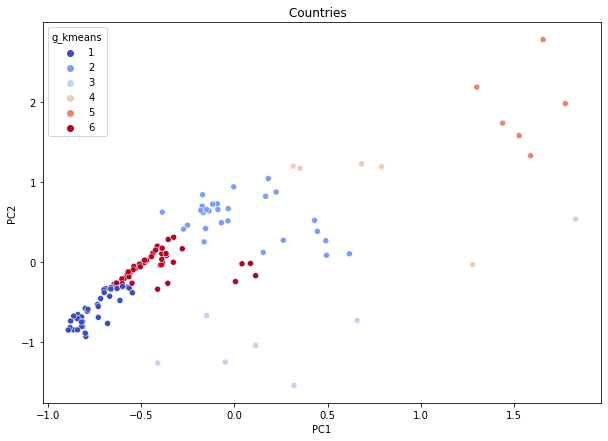

In [396]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="PC1",
                    y="PC2",
                    data=df_T_chicken,hue="g_kmeans",palette="coolwarm")
plt.title("Countries  ")

## As we saw on the circle of correlation, the countries that would be targeted would be the one in bottom left corner which would be then the ones of the group 1.

## Kmeans PC1 and PC3

C:\Users\phild\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


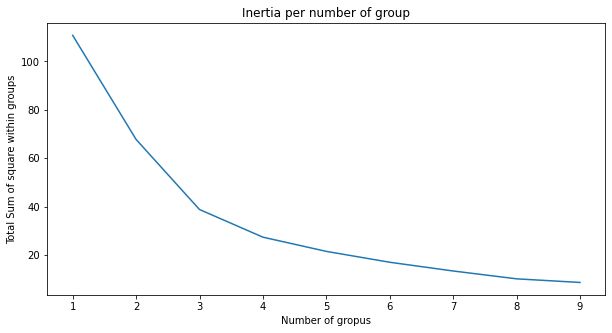

In [393]:
inertia_per_group(df_T_chicken[['PC1','PC3']],10)

As for the the first Kmean, I choose 6 groups

### Creating the groups and adding them to the dataframe

In [394]:
kmean=KMeans(n_clusters=6)
kmean.fit(df_T_chicken[['PC1','PC3']]) 
groups_bis=kmean.labels_+1
df_T_chicken['g_PC3_kmeans']=groups_bis
df_T_chicken

,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,PC1,PC2,PC3,g_kmeans,g_PC3_kmeans
Zone,,,,,,,,,,,
Afrique du Sud,0.892940,-0.136597,1.990769,0.280981,-0.199216,0.042476,0.789773,1.190863,0.107708,4,6
Albanie,-0.421378,-0.259247,-0.341778,-0.317074,-0.151632,-0.273115,-0.645985,-0.277406,0.062608,1,1
Algérie,-1.099955,-0.259247,-0.518189,-0.222340,-0.199216,-0.048604,-0.680452,-0.766670,0.532526,1,5
Allemagne,-0.209918,0.998398,3.598070,0.225659,-0.544205,0.192025,1.589711,1.326158,1.057439,5,3
Angola,-0.815741,-0.259247,0.829395,-0.306589,-0.199216,-0.116079,-0.364385,0.080980,0.809838,6,2
...,...,...,...,...,...,...,...,...,...,...,...
Zambie,-1.301216,-0.257300,-0.469186,-0.304057,-0.199216,-0.191663,-0.820585,-0.749331,0.626484,1,5
Égypte,-0.652557,-0.257300,0.011044,0.082473,-0.472828,0.272397,-0.149123,-0.667389,0.452677,3,2
Émirats arabes unis,1.421930,-0.076246,1.593844,-0.304419,-0.508517,-0.234615,0.315902,1.197121,-0.642061,4,6


### Plot

Text(0.5, 1.0, 'Countries  ')

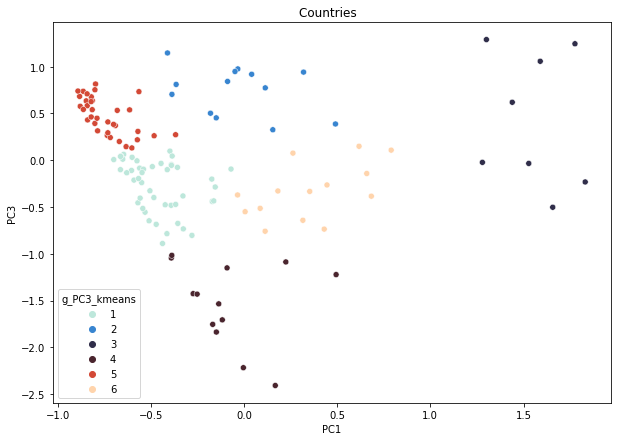

In [397]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="PC1",
                    y="PC3",
                    data=df_T_chicken,hue="g_PC3_kmeans",palette="icefire")
plt.title("Countries  ")

## Here as we saw on the second circle of correlation, on this graph it would be the countries on the upper left it, therfore the countries of the group 5 

# Conclusion and list of target countries for exporting chicken 

## After performing the PCA and analysing the weights of each variables for each principal components, I have selected the variables "Production", "Disponibilité alimentaire en quantité (kg/personne/an)" and "Population" to identify areas on PC1PC2 and PC1PC3 graphs. As the goal is to find interesting countries for exporting, the ones with low production, low food availibility (disponibilité alimentaire) and the highest populations are the ones targeted. The kmean method was used to then find (on the graphs) the groups that corresponds to those criteria.   
## Below the list of the countries selected:

In [399]:
df_T_chicken[(df_T_chicken.g_kmeans==1) | (df_T_chicken.g_PC3_kmeans==5)].index

Index(['Albanie', 'Algérie', 'Arménie', 'Azerbaïdjan', 'Bosnie-Herzégovine',
       'Botswana', 'Bénin', 'Cameroun', 'Croatie', 'Côte d'Ivoire', 'Eswatini',
       'Ghana', 'Géorgie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho',
       'Liban', 'Libéria', 'Luxembourg', 'Monténégro', 'Namibie', 'Niger',
       'Norvège', 'Ouganda', 'Paraguay', 'Rwanda', 'République de Moldova',
       'République populaire démocratique de Corée', 'Serbie', 'Sierra Leone',
       'Slovaquie', 'Sri Lanka', 'Suisse', 'Suède', 'Sénégal', 'Tchad', 'Togo',
       'Tunisie', 'Uruguay', 'Yémen', 'Zambie', 'Équateur', 'Îles Salomon'],
      dtype='object', name='Zone')